In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
url = "https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv"
df = pd.read_csv (url,sep = ",")

# I. Overview

In [3]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
df.shape

(15000, 18)

From the **info** table and the **shape** shows:
* dataframe has 15000 rows and 18 columns
* In which columns latitude, longitude, yearBuilt, priorSaleDate and priorSaleAmount are missing data.
* Regarding the data type, the variables zipcode, lastSaleDate and priorSaleDate are not in the correct data type format

# II. Data Cleaning

## Converting data types

In [6]:
df.zipcode = df.zipcode.astype(str)                   # Convert zipcode as string
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)   # Convert priorSaleDate as datetime
df.lastSaleDate = pd.to_datetime(df.lastSaleDate)     # Convert lastSaleDate as datetime
df.dtypes

id                          int64
address                    object
city                       object
state                      object
zipcode                    object
latitude                  float64
longitude                 float64
bedrooms                    int64
bathrooms                 float64
rooms                       int64
squareFootage               int64
lotSize                     int64
yearBuilt                 float64
lastSaleDate       datetime64[ns]
lastSaleAmount              int64
priorSaleDate      datetime64[ns]
priorSaleAmount           float64
estimated_value             int64
dtype: object

## Checking duplicate 

In [7]:
df[df.duplicated('address', keep = False) == True]  # check address with two or more houses

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaT,NaN,745537
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,670436
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,671744
6145,4277764,3650 N Adams St,Denver,CO,80205,NaN,NaN,1,1.0,3,472,9370,1926.0,2015-07-20,250000,NaT,NaN,745483


In [8]:
df.drop(df.index[4762], axis = 0, inplace = True) # drop one house duplicated

## Checking outliers in lastSaleAmount and priorSaleAmount

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='lastSaleAmount'>

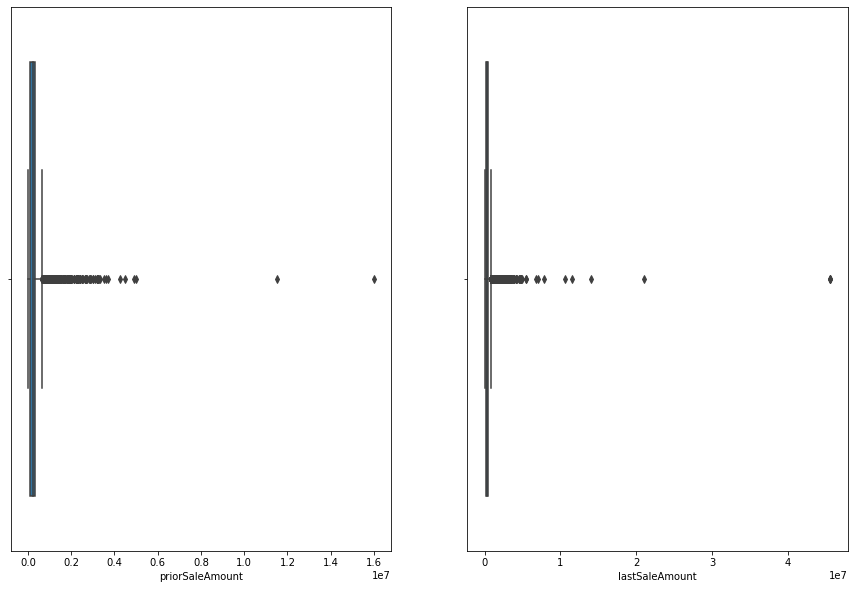

In [10]:
fig, ax=plt.subplots(1,2, figsize=(15,10))
sns.boxplot(x= df['priorSaleAmount'],ax=ax[0]) #check outliers by boxplot
sns.boxplot(x=df['lastSaleAmount'],ax=ax[1]) 

There exists one or several data points that have a very large value (greater than 40000000) compared to the remaining values in lastSaleAmount.

In [11]:
print(np.where(df.lastSaleAmount > 4e7))

(array([2220, 2473, 2971], dtype=int64),)


In [12]:
df.loc[[2220, 2473, 2971], 'lastSaleAmount']

2220    45600000
2473    45600000
2971    45600000
Name: lastSaleAmount, dtype: int64

In [13]:
df = df[df.lastSaleAmount != 45600000] # define new dataframe where lastSaleAmount != 45600000

## Imputing missing data

In [14]:
df.isnull().sum(axis=0).sort_values(ascending=False)  # summing up missing data

priorSaleDate      3824
priorSaleAmount    3710
latitude             14
longitude            14
yearBuilt             1
id                    0
squareFootage         0
lastSaleAmount        0
lastSaleDate          0
lotSize               0
rooms                 0
address               0
bathrooms             0
bedrooms              0
zipcode               0
state                 0
city                  0
estimated_value       0
dtype: int64

In [15]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100      # Percentage of missing data over all data

priorSaleDate      25.500133
priorSaleAmount    24.739931
latitude            0.093358
longitude           0.093358
yearBuilt           0.006668
id                  0.000000
squareFootage       0.000000
lastSaleAmount      0.000000
lastSaleDate        0.000000
lotSize             0.000000
rooms               0.000000
address             0.000000
bathrooms           0.000000
bedrooms            0.000000
zipcode             0.000000
state               0.000000
city                0.000000
estimated_value     0.000000
dtype: float64

In [16]:
(df==0).sum().sort_values(ascending=False) # attributes have zero value

priorSaleAmount    1296
rooms                 9
bathrooms             7
bedrooms              3
squareFootage         0
priorSaleDate         0
lastSaleAmount        0
lastSaleDate          0
yearBuilt             0
lotSize               0
id                    0
address               0
longitude             0
latitude              0
zipcode               0
state                 0
city                  0
estimated_value       0
dtype: int64

In [17]:
df[(df.lastSaleAmount == df.priorSaleAmount) & (df.lastSaleDate == df.priorSaleDate)].value_counts()

id         address             city    state  zipcode  latitude   longitude    bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  lastSaleDate  lastSaleAmount  priorSaleDate  priorSaleAmount  estimated_value
236166     756 Inca St         Denver  CO     80204    39.728430  -104.997254  2         1.0        5      756            3120     1894.0     2000-07-13    100000          2000-07-13     100000.0         332329             1
48900143   1000 Steele St      Denver  CO     80206    39.732257  -104.949189  3         4.0        6      2245           4460     1918.0     2001-01-05    329000          2001-01-05     329000.0         751865             1
46235908   2565 Leyden St      Denver  CO     80207    39.754128  -104.915504  4         4.0        8      2974           8120     1941.0     2002-08-06    265000          2002-08-06     265000.0         903765             1
46261137   2641 Elm St         Denver  CO     80207    39.755492  -104.929721  3         2.0        6    

In [18]:
df[(df.lastSaleAmount == df.priorSaleAmount) & (df.lastSaleDate == df.priorSaleDate)].count() # data where lastSaleAmount = priorSaleAmount & lastSaleDate = priorSaleDate

id                 154
address            154
city               154
state              154
zipcode            154
latitude           154
longitude          154
bedrooms           154
bathrooms          154
rooms              154
squareFootage      154
lotSize            154
yearBuilt          154
lastSaleDate       154
lastSaleAmount     154
priorSaleDate      154
priorSaleAmount    154
estimated_value    154
dtype: int64

In [19]:
df['time_period'] = df.lastSaleDate - df.priorSaleDate
df_1 = df[df['priorSaleAmount']==0]
df_2 = df[df['priorSaleAmount']!=0]

In [20]:
df_1['time_period'].mean()

Timedelta('611 days 18:21:06.666666664')

In [21]:
df_2['time_period'].mean()

Timedelta('2080 days 14:17:56.063183488')

* There are a large numbers of missing values for priorSaleDate (3824) and priorSaleAmount(3710) and also 1296 zero values in priorSaleAmount
* The time period between the last and prior sale dates is shorter when prior sale amount is zero (611 days on average) compared to when priorSaleAmount is not zero (2080 days on average). It is possible that such prior sales never occurred and rather represent a stage in the process of the last sale
* There are 154 samples in which priorSaleDate and priorSaleAmount are identical to lastSaleDate and lastSaleAmount

Based on the above observations, assuming that when priorSaleAmount = 0 or null, there was only one sale. 
* I set priorSaleAmount and priorSaleDate to lastSaleAmount and lastSaleDate when priorSaleAmount is either zero or missing, or when priorSaleDate is missing. 
* I further assume that observations with identical lastSaleDate and priorSaleDate but different lastSaleAmount and priorSaleAmount also have only one sale, and change priorSaleAmount to lastSaleAmount
* In the records with priorSaleDate coming after lastSaleDate, I set priorSaleDate to lastSaleDate.

The other features include longitude, lattitude, yearBuit:
* replace missing longitude and latitude by mean
* replace missing yearBuilt by median


In [22]:
df.priorSaleDate[df.priorSaleAmount.isnull()] = df.lastSaleDate

In [23]:
df.priorSaleAmount[df.priorSaleAmount.isnull() | df.priorSaleAmount == 0] = df.lastSaleAmount

In [24]:
df.priorSaleDate[df.priorSaleDate.isnull()] = df.lastSaleDate

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/695873346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleDate[df.priorSaleDate.isnull()] = df.lastSaleDate


In [25]:
df.priorSaleAmount[df.priorSaleDate.isnull()] = df.lastSaleAmount

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/4215533661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleAmount[df.priorSaleDate.isnull()] = df.lastSaleAmount


In [26]:
df.priorSaleAmount[(df.priorSaleAmount != df.lastSaleAmount) & (df.priorSaleDate == df.lastSaleDate)] = df.lastSaleAmount

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/4278621763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleAmount[(df.priorSaleAmount != df.lastSaleAmount) & (df.priorSaleDate == df.lastSaleDate)] = df.lastSaleAmount


In [27]:
df.priorSaleDate[df.lastSaleDate - df.priorSaleDate < pd.Timedelta('0D')] = df.lastSaleDate

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/3335211650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleDate[df.lastSaleDate - df.priorSaleDate < pd.Timedelta('0D')] = df.lastSaleDate


In [28]:
df.latitude[df['latitude'].isnull()]=df['latitude'].mean()
df.longitude[df['longitude'].isnull()]=df['longitude'].mean()

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/1524386353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.latitude[df['latitude'].isnull()]=df['latitude'].mean()
C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/1524386353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.longitude[df['longitude'].isnull()]=df['longitude'].mean()


In [29]:
df.yearBuilt[df.yearBuilt.isnull()]=df.yearBuilt.median()

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/454452595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.yearBuilt[df.yearBuilt.isnull()]=df.yearBuilt.median()


In [30]:
df.isnull().sum(axis=0)

id                    0
address               0
city                  0
state                 0
zipcode               0
latitude              0
longitude             0
bedrooms              0
bathrooms             0
rooms                 0
squareFootage         0
lotSize               0
yearBuilt             0
lastSaleDate          0
lastSaleAmount        0
priorSaleDate         0
priorSaleAmount       0
estimated_value       0
time_period        3824
dtype: int64

In [31]:
df.drop('time_period', axis=1, inplace= True)

In [32]:
df

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,2008-04-03,330000.0,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,2000-08-24,333000.0,1080081
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794


# III. Exploring Data

**Create new columns**

In [33]:
df['salediff'] = df['lastSaleAmount'] - df['priorSaleAmount']

In [34]:
df['timediff'] = df['lastSaleDate'] - df['priorSaleDate']

In [35]:
df['yeardiff'] =df['timediff']/np.timedelta64(1,'Y')           

In [36]:
df['delta'] = (df['lastSaleAmount'] - df['priorSaleAmount'])/(df['yeardiff']*df['lotSize']) # The price per square foot of lot increases per year

In [37]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,salediff,timediff,yeardiff,delta
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,-90700.0,2044 days,5.596282,-1.625922
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,...,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963,0.0,0 days,0.000000,NaN


<AxesSubplot:xlabel='delta'>

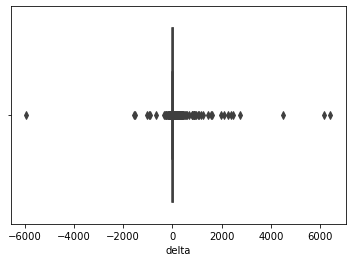

In [38]:
sns.boxplot(x=df.delta)

**Define price_change column**
* delta > 0: price of houses increase
* delta = 0: price of houses stay the same (not change)
* delta < 0: price of houses decrease

In [39]:
df['price_change']= np.where(df.delta>0,'increase',
                        np.where(df.delta<0,'decrease','not change'))

In [40]:
df['price_change'].value_counts()

increase      8857
not change    5427
decrease       712
Name: price_change, dtype: int64

* 8851 houses increase in price
* 712 houses decrease in price
* And there are 5419 houses with the same price

(array([ 712.,    0.,    0.,    0.,    0., 5427.,    0.,    0.,    0.,
        8857.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

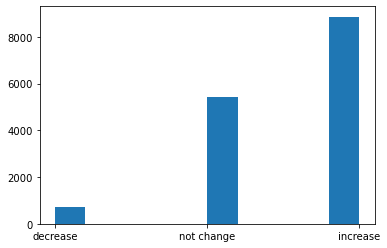

In [41]:
plt.hist(df['price_change'])

## rooms, bedrooms, bathrooms and other_rooms in a house

In [42]:
df['other_rooms'] = df['rooms'] - (df['bedrooms'] + df['bathrooms'])

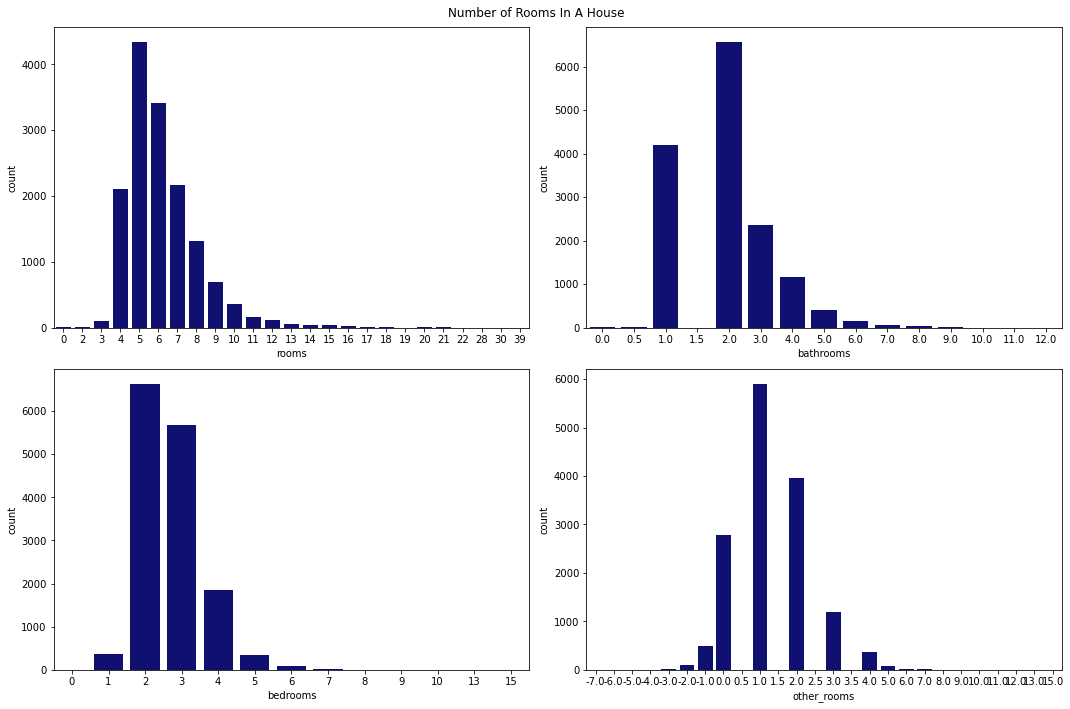

In [43]:
fig, axes = plt.subplots ( 2,2, figsize=(15,10))
fig.suptitle('Number of Rooms In A House')

# rooms
sns.countplot(x=df['rooms'], color ='navy', ax=axes[0,0])
# bathrooms
sns.countplot(x=df['bathrooms'], color ='navy', ax=axes[0,1])
# bedrooms
sns.countplot(x=df['bedrooms'], color ='navy', ax=axes[1,0])
#other_rooms
sns.countplot(x=df['other_rooms'],  color ='navy', ax=axes[1,1])

fig.tight_layout()


## squareFootage

In [44]:
df['squareFootage'].describe()

count    14996.000000
mean      1514.588357
std        830.697612
min        350.000000
25%        986.000000
50%       1268.000000
75%       1766.250000
max      10907.000000
Name: squareFootage, dtype: float64

In [45]:
houseSize = np.where(df['squareFootage'] <1000, 'small',
                           np.where((df['squareFootage'] >= 1000) & (df['squareFootage'] < 2500),'medium',
                                    np.where((df['squareFootage'] >=2500) & (df['squareFootage']<6000),'large', 'superlarge')))

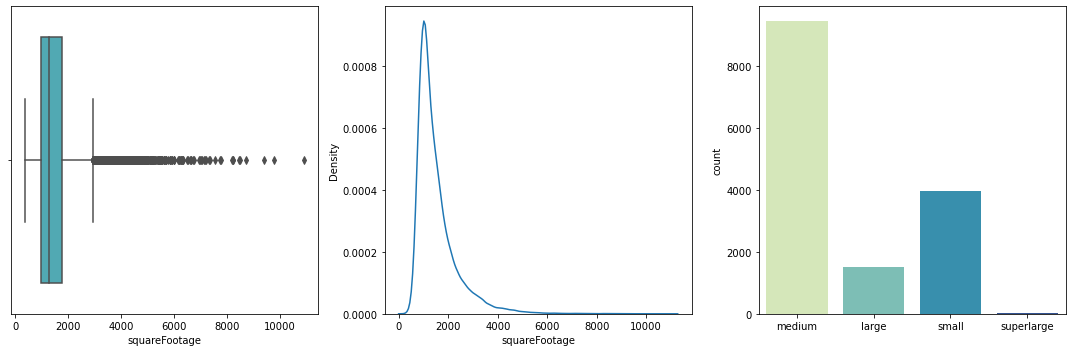

In [46]:
fig, axes1 = plt.subplots(1, 3, figsize=(15,5))

# squareFootage
sns.boxplot(x=df['squareFootage'], palette='YlGnBu', ax=axes1[0])
sns.kdeplot(df['squareFootage'], ax=axes1[1])
# houseSize
sns.countplot(x=houseSize, palette = 'YlGnBu', ax=axes1[2])

fig.tight_layout()

## lotSize

In [47]:
df['lotSize'].describe()

count     14996.000000
mean       5820.964124
std        3013.636736
min         278.000000
25%        4620.000000
50%        5950.000000
75%        6270.000000
max      122839.000000
Name: lotSize, dtype: float64

<AxesSubplot:xlabel='lotSize', ylabel='Density'>

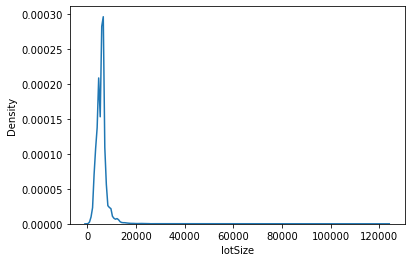

In [48]:
sns.kdeplot(df['lotSize'])

<AxesSubplot:xlabel='lotSize', ylabel='squareFootage'>

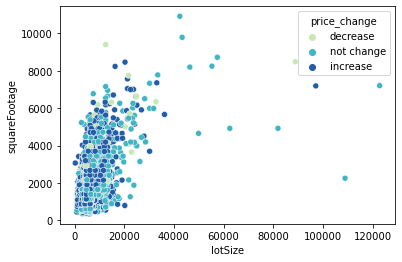

In [49]:
sns.scatterplot(x='lotSize', y='squareFootage',data=df, hue='price_change', palette = 'YlGnBu') 

## yearBuilt

In [50]:
from datetime import date
df['houseAge'] = date.today().year - df.yearBuilt

<AxesSubplot:xlabel='houseAge', ylabel='Count'>

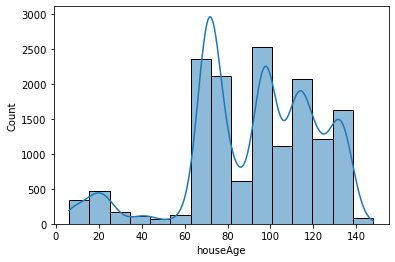

In [51]:
sns.histplot(df['houseAge'], kde=True, bins=15)

Houses aged 70 and over make up the majority of the data set

## Correlate

In [52]:
corr = df.corr()
corr.style.background_gradient(cmap='YlGnBu')

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,salediff,yeardiff,delta,other_rooms,houseAge
id,1.000000,-0.092410,0.039299,0.076013,0.128123,0.093842,0.142957,0.045411,0.040740,0.133481,0.082198,0.126172,0.092351,0.067327,0.033437,-0.028362,-0.040740
latitude,-0.092410,1.000000,0.499553,-0.083010,-0.237452,-0.213389,-0.256246,-0.092853,-0.105325,-0.220928,-0.201983,-0.266126,-0.045747,-0.048935,0.034026,-0.055836,0.105325
longitude,0.039299,0.499553,1.000000,0.022064,0.107189,0.025865,0.067557,0.066152,0.060674,0.103044,0.079179,0.121826,0.045751,-0.001063,-0.003040,-0.078969,-0.060674
bedrooms,0.076013,-0.083010,0.022064,1.000000,0.505780,0.712311,0.620933,0.158524,-0.062010,0.254649,0.223391,0.369094,0.068035,0.004718,0.004748,-0.077071,0.062010
bathrooms,0.128123,-0.237452,0.107189,0.505780,1.000000,0.686260,0.804190,0.259122,0.194312,0.544720,0.438153,0.715964,0.210027,0.021869,-0.003348,-0.231383,-0.194312
rooms,0.093842,-0.213389,0.025865,0.712311,0.686260,1.000000,0.771185,0.175983,-0.047901,0.419222,0.356977,0.581013,0.129525,0.031008,-0.004385,0.435570,0.047901
squareFootage,0.142957,-0.256246,0.067557,0.620933,0.804190,0.771185,1.000000,0.369267,0.115231,0.604060,0.510134,0.824502,0.193517,0.029151,-0.004960,0.013033,-0.115231
lotSize,0.045411,-0.092853,0.066152,0.158524,0.259122,0.175983,0.369267,1.000000,0.285623,0.345620,0.322185,0.456543,0.061494,-0.029793,-0.023880,-0.083655,-0.285623
yearBuilt,0.040740,-0.105325,0.060674,-0.062010,0.194312,-0.047901,0.115231,0.285623,1.000000,0.140267,0.117253,0.174474,0.046892,-0.041106,-0.008865,-0.222118,-1.000000
lastSaleAmount,0.133481,-0.220928,0.103044,0.254649,0.544720,0.419222,0.604060,0.345620,0.140267,1.000000,0.818932,0.749661,0.361905,0.119355,0.025268,-0.035743,-0.140267


**We can see**
* House parameters including bedrooms, bathrooms, rooms and squareFootage are strongly correlated for priorSaleAmount, lastSaleAmount and estimated value. Besides, priorSaleAmount, lastSaleAmount and estimated_value values are also correlated:
    * priorSaleAmount has the strongest correlation for lastSaleAmount (0.82) and vice versa.
    * estimated_value has the strongest correlation for squareFootage (0.824) and vice versa.

 ## Changes in priorSaleAmount & lastSaleAmount

In [53]:
df['yearPriorSale'] = pd.DatetimeIndex(df['priorSaleDate']).year

In [54]:
df['yearLastSale'] = pd.DatetimeIndex(df['lastSaleDate']).year

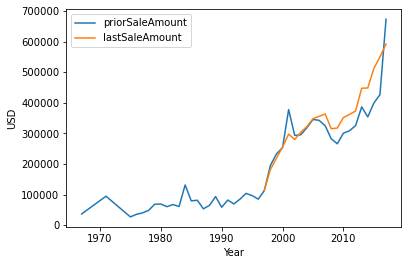

In [55]:
df.groupby('yearPriorSale')['priorSaleAmount'].mean().plot()
df.groupby('yearLastSale')['lastSaleAmount'].mean().plot()

plt.xlabel('Year')
plt.ylabel('USD')
 
plt.legend(['priorSaleAmount', 'lastSaleAmount']);

In [56]:
df[['salediff','priorSaleAmount','lastSaleAmount']].describe()

,salediff,priorSaleAmount,lastSaleAmount
count,1.499600e+04,1.499600e+04,1.499600e+04
mean,9.225940e+04,3.040543e+05,3.963137e+05
std,2.597149e+05,4.218748e+05,4.394788e+05
min,-1.390000e+07,1.090000e+02,2.590000e+02
25%,0.000000e+00,1.470000e+05,1.940000e+05
50%,4.010000e+04,2.310000e+05,3.199250e+05
75%,1.325000e+05,3.550000e+05,4.630000e+05
max,4.500000e+06,2.100000e+07,2.100000e+07


In [57]:
df.id[df['priorSaleAmount'] != df['lastSaleAmount']].count()

9569

* priorSaleAmount(pSA) and lastSaleAmount(lSA) of houses started to be different from around  2000 
* There are 9569 houses that have price change of 14996 houses

# IV. Factors affecting price change of houses in Denver 

## Location of houses in Denver

In [58]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [59]:
from folium import Map
from folium.plugins import HeatMap

In [60]:
map = Map(location=[39.742043, -104.991531], zoom_start=13, ) # location of Denver CO

heatmap = HeatMap( list(zip(df.latitude, df.longitude, df["salediff"])),
                   min_opacity=0.2,
                   max_val=df["salediff"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(map)
map

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/3068484068.py:3: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap = HeatMap( list(zip(df.latitude, df.longitude, df["salediff"])),


- Houses with great salediff value are concentrated in locations with greenery and lakes such as City Park (Denver Zoo), Washington Park, and golf and tennis courts (Denver Country Club).

- In addition, these houses are also located on major streets such as East Alamenda Avenue, East Virginia Avenue, East 1st, 6th, and 8th Avenue.

- The biggest salediff properties are located between East 1st and 6th Avenue, northeast of Denver Country Club

## rooms, bathrooms, bedrooms and other rooms

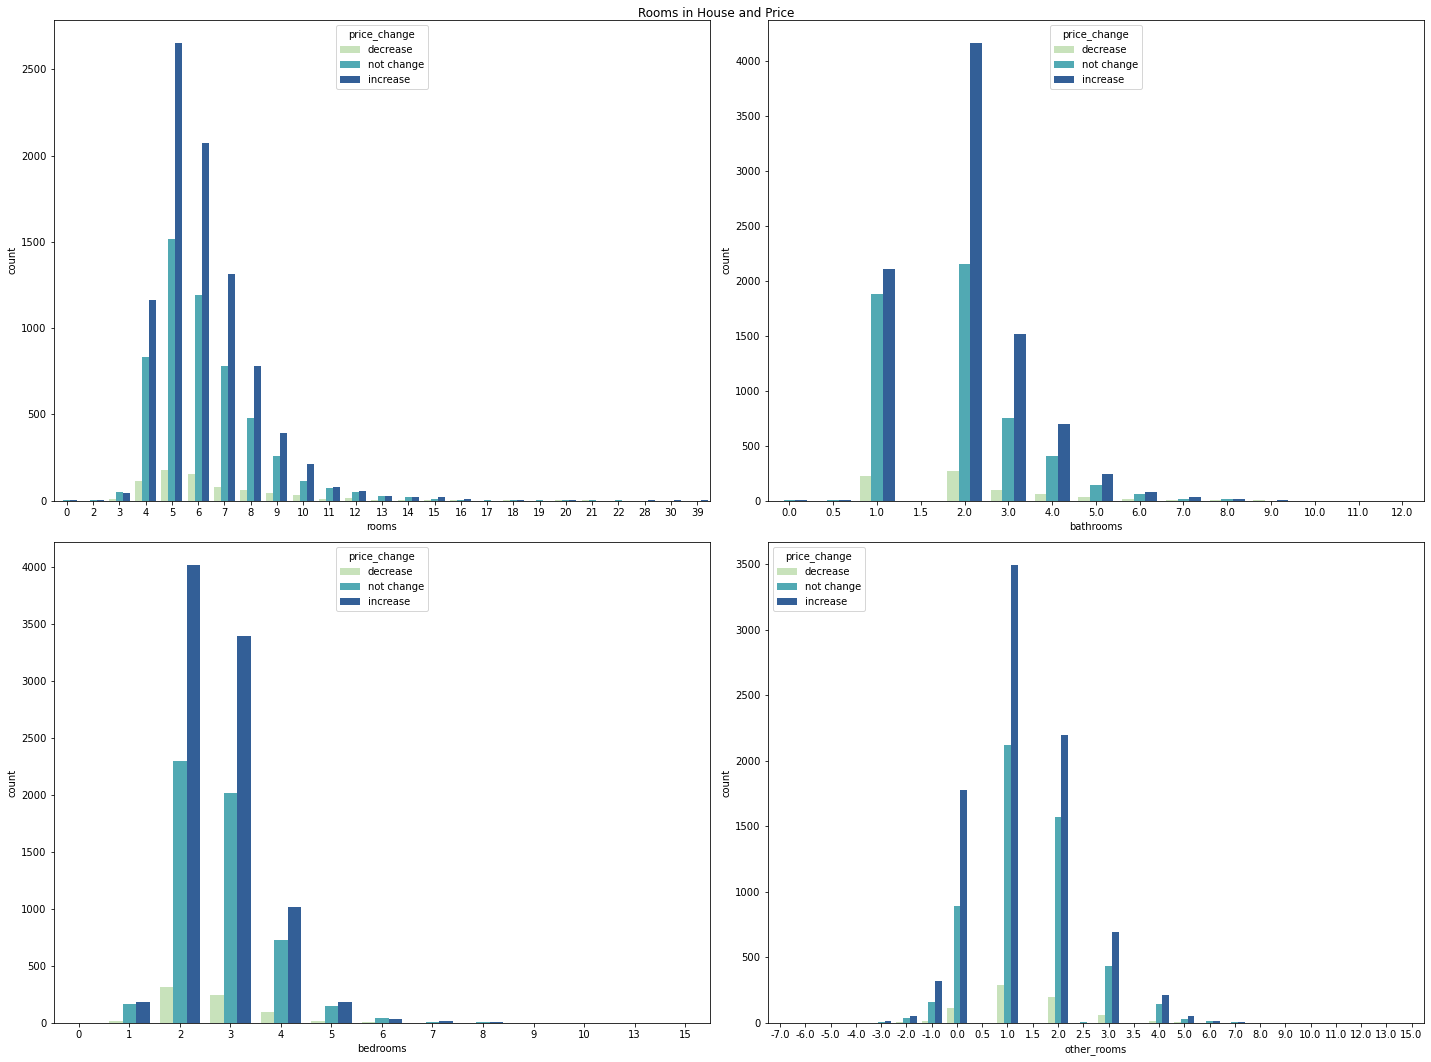

In [61]:
fig,axes2= plt.subplots(2,2, figsize=(20,15))
fig.suptitle ('Rooms in House and Price')

#rooms
sns.countplot(x = df['rooms'], hue=df['price_change'], palette='YlGnBu', ax =axes2[0,0])
#bathrooms
sns.countplot(x = df['bathrooms'], hue=df['price_change'],palette='YlGnBu', ax =axes2[0,1])
#bedrooms
sns.countplot(x = df['bedrooms'], hue=df['price_change'],palette='YlGnBu', ax =axes2[1,0])
#other_rooms
sns.countplot(x = df['other_rooms'], hue=df['price_change'],palette='YlGnBu', ax =axes2[1,1])

fig.tight_layout()

* Figure 1 (rooms): houses with a 5-room structure account for the majority in all 3 groups of increase, decrease and not change
* Figure 2 (bathrooms): houses which have 2 bathrooms make up the majority in all 3 groups of increase, decrease and not change
* Figure 3 (bedrooms): houses which have 2 bedrooms make up the majority in all 3 groups of increase, decrease and not change
* Figure 4 (other_rooms): houses which have 1 other_rooms also make up the majority in all 3 groups of increase, decrease and not change

Based on 4 figures:
   houses that have a 5-room structure consisting of 2 bedrooms, 2 bathrooms and 1 other room (possibly a living room) that makes up the majority of the data set and 3 groups of house prices.

## houseAge

In [62]:
df['house_status'] = np.where(df.houseAge <50,'new',
                        np.where((df.houseAge >=50)&(df.houseAge<100),'old','too old')) # Define new variables from yearBuilt
df['house_status'].value_counts()

old        7432
too old    6430
new        1134
Name: house_status, dtype: int64

(array([1134.,    0., 6430.,    0., 7432.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

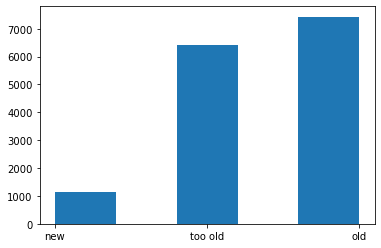

In [63]:
plt.hist(df.house_status, bins=5)

<AxesSubplot:xlabel='house_status', ylabel='count'>

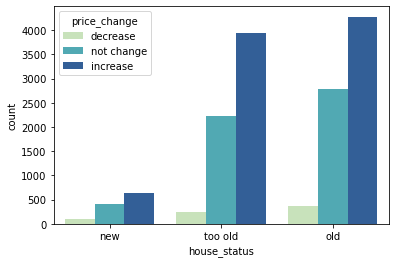

In [64]:
sns.countplot(data = df, x='house_status', hue = 'price_change', palette ='YlGnBu')

* houses in the **old** group make up the majority of the data set and also in all 3 house price groups
* Besides, the **too old** group also accounts for a significant number

## price_change vs houseAge, squareFootage, lotSize and priorSaleAmount

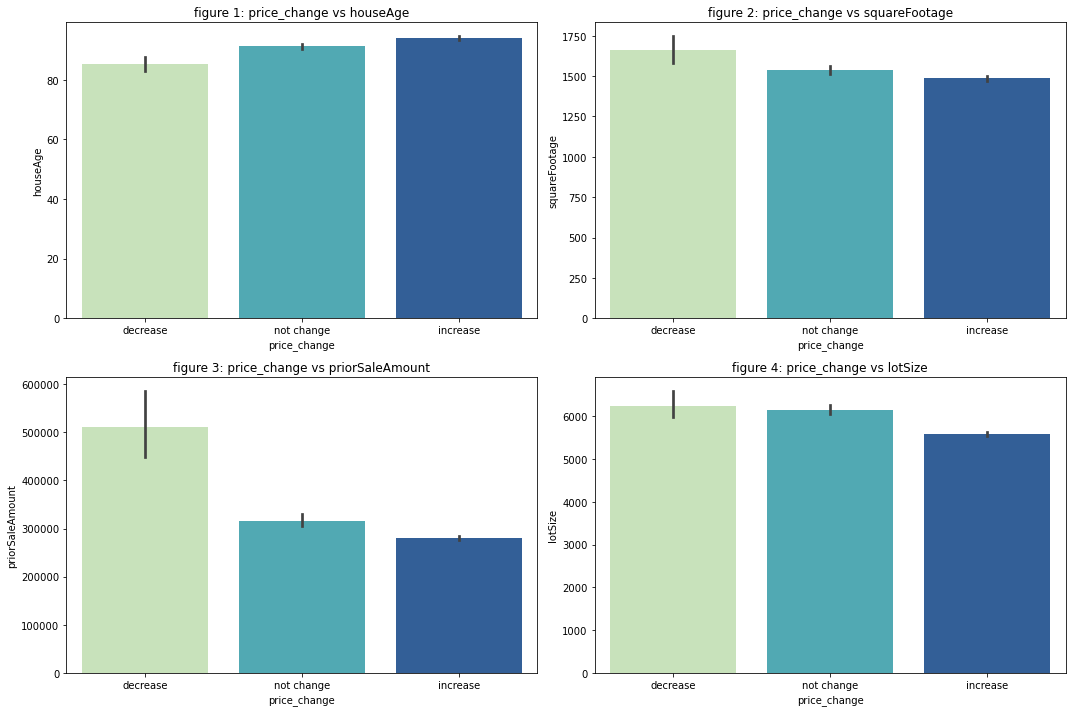

In [65]:
fig, axes0=plt.subplots(2,2,figsize=(15,10))

# price_change vs houseAge
sns.barplot(x=df['price_change'],y=df['houseAge'],palette = 'YlGnBu', ax=axes0[0,0])
axes0[0,0].set_title('figure 1: price_change vs houseAge')
# price_change vs squareFootage
sns.barplot(x=df['price_change'],y=df['squareFootage'],palette = 'YlGnBu', ax=axes0[0,1])
axes0[0,1].set_title('figure 2: price_change vs squareFootage')
# price_change vs priorSaleAmount
sns.barplot(x=df['price_change'],y=df['priorSaleAmount'],palette = 'YlGnBu', ax=axes0[1,0])
axes0[1,0].set_title('figure 3: price_change vs priorSaleAmount')
# price_change vs lotSize
sns.barplot(x=df['price_change'],y=df['lotSize'],palette = 'YlGnBu', ax=axes0[1,1])
axes0[1,1].set_title('figure 4: price_change vs lotSize')
fig.tight_layout()

* figure 1: all 3 house price groups have average construction years over 80 years
* figure 2: all 3 groups have an average squareFootage around 1500
* figure 3: the decrease group has the mean value of priorSaleAmount relatively larger than the other 2 groups (about 500000), while the increase group has the lowest value (about 250000)
* figure 4: decrease and not change groups have an average lotSize value around 6000, the increase group is lower than the other 2 groups

# V. Factors affect house price increase in Denver

In [66]:
df_inc=df[df['delta']>0] #data for price of houses increase 

## Rooms

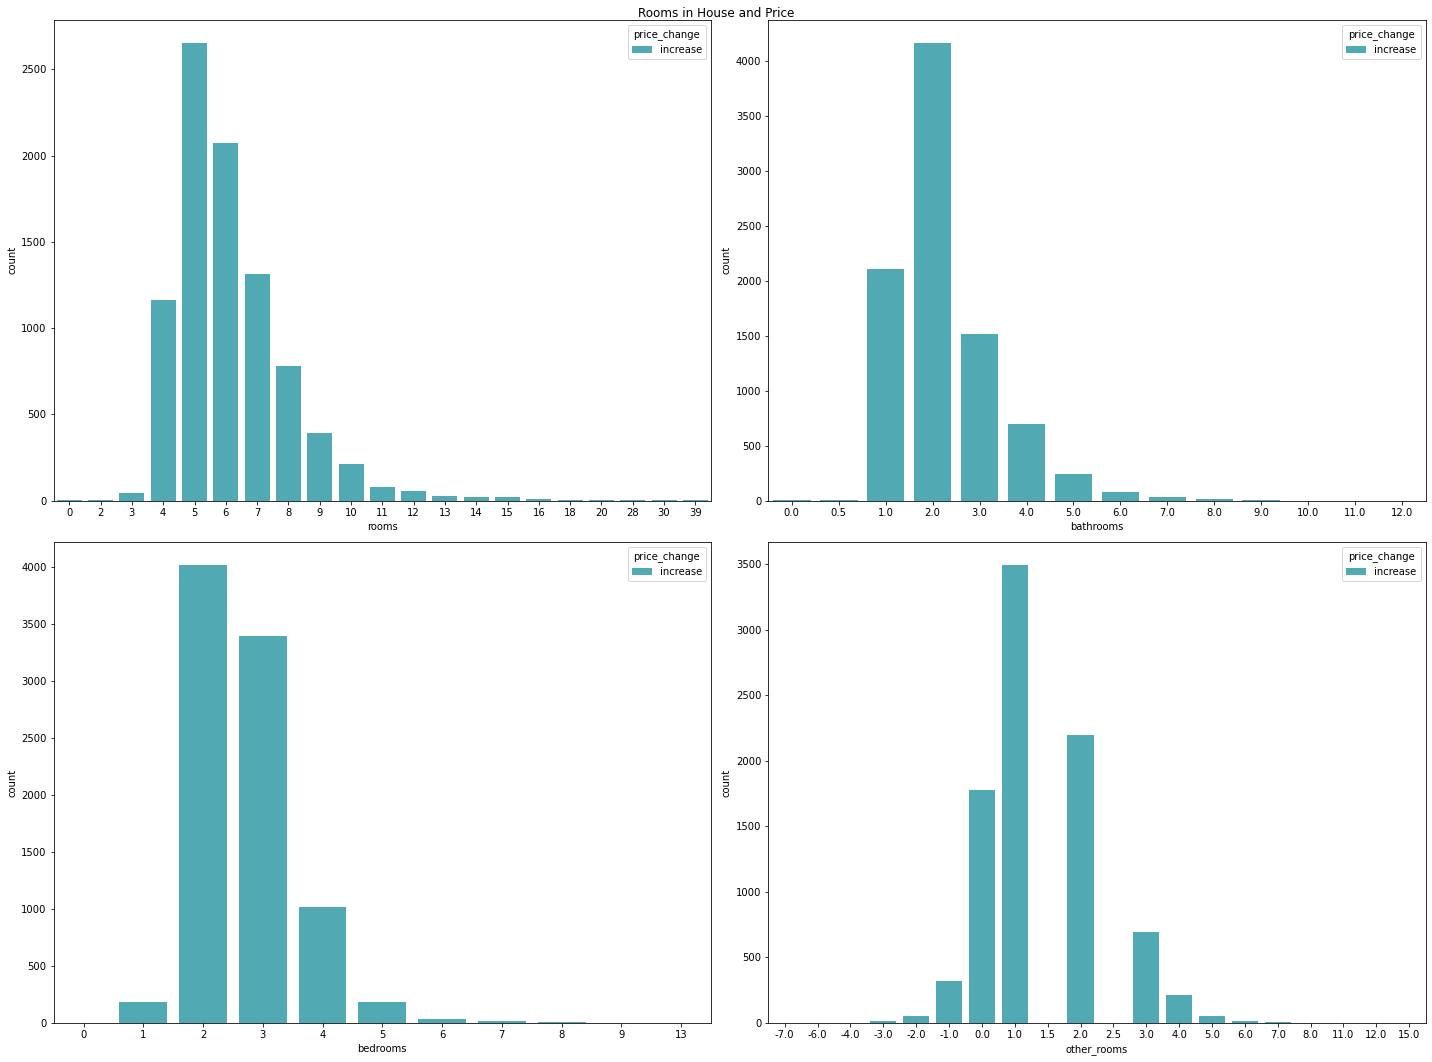

In [67]:
fig,axes2= plt.subplots(2,2, figsize=(20,15))
fig.suptitle ('Rooms in House and Price')

#rooms
sns.countplot(x = df_inc['rooms'], hue=df_inc['price_change'], palette='YlGnBu', ax =axes2[0,0])
#bathrooms
sns.countplot(x = df_inc['bathrooms'], hue=df_inc['price_change'],palette='YlGnBu', ax =axes2[0,1])
#bedrooms
sns.countplot(x = df_inc['bedrooms'], hue=df_inc['price_change'],palette='YlGnBu', ax =axes2[1,0])
#other_rooms
sns.countplot(x = df_inc['other_rooms'], hue=df_inc['price_change'],palette='YlGnBu', ax =axes2[1,1])

fig.tight_layout()

Like above, houses with a 5-room structure account for the majority in group of increase (including 2 bedrooms, 2 bathrooms, and 1 other room)

## houseAge

<AxesSubplot:xlabel='yeardiff', ylabel='salediff'>

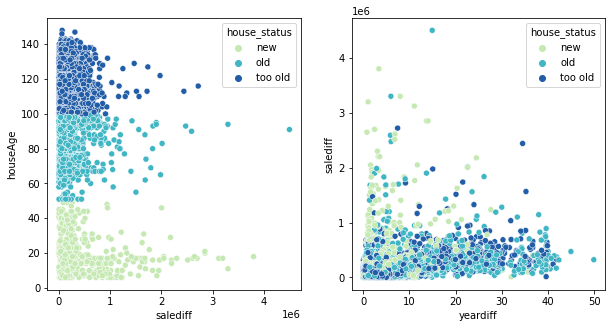

In [68]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data = df_inc, x='salediff',y='houseAge', hue='house_status', palette ='YlGnBu', ax=ax[0])
sns.scatterplot(data = df_inc, x='yeardiff',y='salediff', hue='house_status', palette ='YlGnBu', ax=ax[1])

* houses with the majority of years of construction under 1000000
* the house with the largest salediff (more than  4000000) is nearly 100 years of construction (old) and need more than 10 years to have this difference in price

<AxesSubplot:xlabel='house_status', ylabel='salediff'>

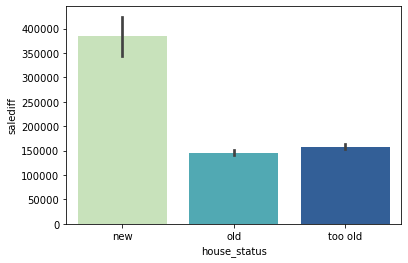

In [69]:
sns.barplot(x='house_status',y='salediff',data=df_inc,palette='YlGnBu')

In [70]:
df_inc.groupby('house_status')['salediff'].mean()

house_status
new        385334.925868
old        145582.620028
too old    158395.434034
Name: salediff, dtype: float64

## lotSize

<AxesSubplot:xlabel='yeardiff', ylabel='delta'>

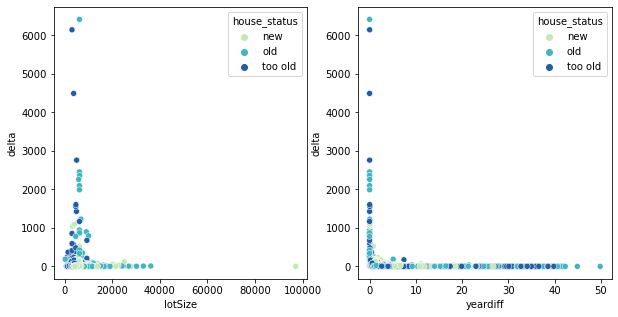

In [71]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data = df_inc, x='lotSize',y='delta',hue='house_status', palette='YlGnBu', ax=ax[0])
sns.scatterplot(data = df_inc, x='yeardiff',y='delta', hue='house_status', palette ='YlGnBu', ax=ax[1])

In [72]:
df_inc1=df_inc[(df_inc['lotSize']<20000) & (df_inc['delta']<200)] # lotSize<20000, delta<200
df_inc1.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,salediff,timediff,yeardiff,delta,price_change,other_rooms,houseAge,yearPriorSale,yearLastSale,house_status
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,...,24500.0,484 days,1.325147,3.058481,increase,-1.0,26.0,2005,2006,new
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,...,75000.0,3083 days,8.440967,1.407005,increase,0.0,25.0,2006,2014,new


<AxesSubplot:xlabel='yeardiff', ylabel='delta'>

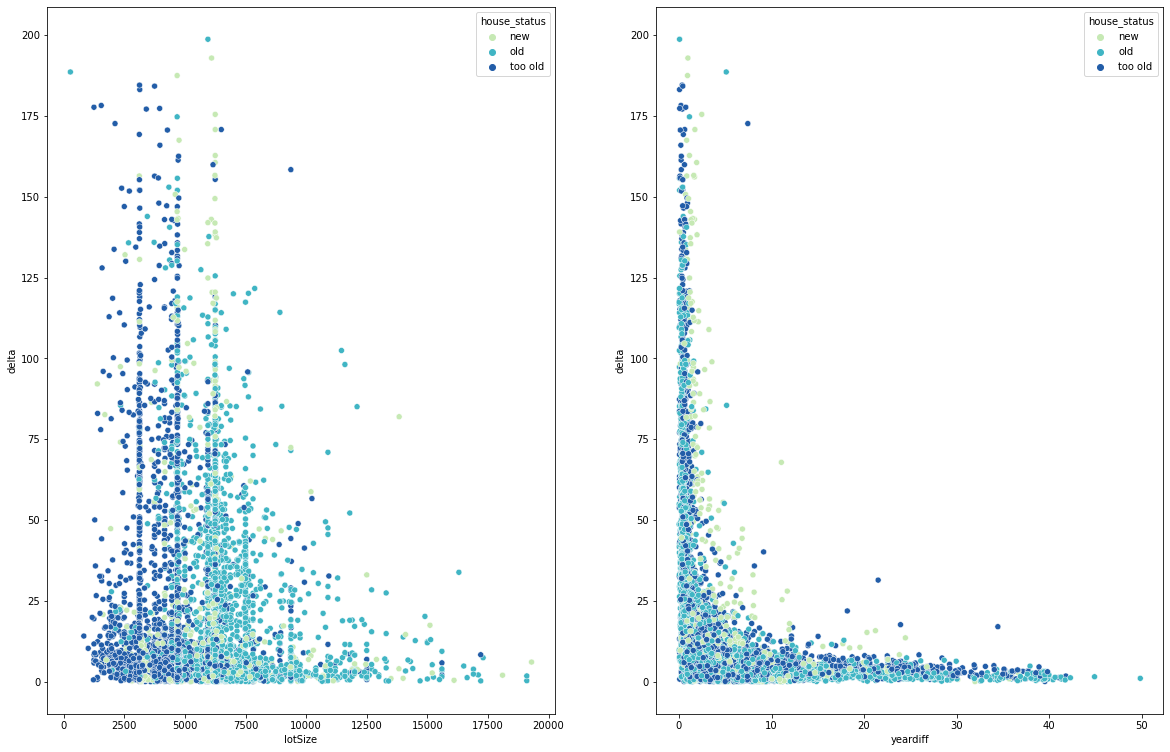

In [73]:
fig, ax=plt.subplots(1,2,figsize=(20,13))
sns.scatterplot(x=df_inc1['lotSize'],y=df_inc1['delta'],hue=df_inc1['house_status'],palette = 'YlGnBu', ax=ax[0])
sns.scatterplot(data = df_inc1, x='yeardiff',y='delta', hue='house_status', palette ='YlGnBu',ax=ax[1])

In [74]:
print(df_inc1[df_inc1['delta'] == df_inc1['delta'].max()])

             id         address    city state zipcode   latitude   longitude  \
12363  18765459  2895 Albion St  Denver    CO   80207  39.758161 -104.939722   

       bedrooms  bathrooms  rooms  ...  salediff  timediff  yeardiff  \
12363         2        2.0      6  ...   68000.0   21 days  0.057496   

            delta  price_change other_rooms  houseAge  yearPriorSale  \
12363  198.771429      increase         2.0      81.0           2012   

       yearLastSale house_status  
12363          2012          old  

[1 rows x 28 columns]


* Houses with rising prices with lotSize are usually less than 12500, and are concentrated in the group of houses with a large number of years of construction (too old)
* most of the houses in the too old group have lotSize under 5000
* Houses with yeardiff have an appreciation period (salediff) less than 10 years, the highest delta (nearly 200) is 21 days

## squareFootage

<AxesSubplot:xlabel='squareFootage', ylabel='delta'>

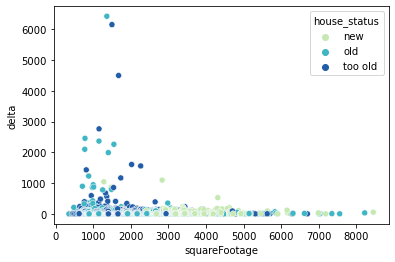

In [75]:
sns.scatterplot(x=df_inc['squareFootage'],y=df_inc['delta'],hue=df_inc['house_status'],palette = 'YlGnBu')

In [76]:
df_inc2=df_inc[(df_inc['squareFootage']<6000) & (df_inc['delta']<200)] # lotSize<20000, delta<200

<AxesSubplot:xlabel='lotSize', ylabel='delta'>

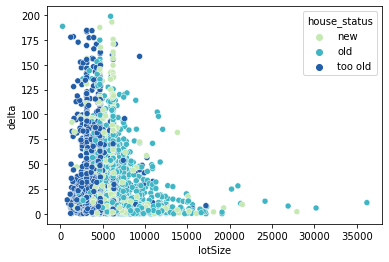

In [77]:
sns.scatterplot(data=df_inc2, x='lotSize',y='delta',hue='house_status',palette = 'YlGnBu')

* most of the rising price houses have lotSize below 10000
* most of the too old houses have lotSize under 5000
* the house with the largest delta value has a lotSize of about 6000

## locations of house_increase

In [78]:
map2 = Map(location=[39.742043, -104.991531], zoom_start=13, ) # location of Denver CO

heatmap2 = HeatMap( list(zip(df_inc.latitude, df_inc.longitude, df_inc["delta"])),
                   min_opacity=0.4,
                   max_val=df_inc["delta"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap2.add_to(map2)
map2

C:\Users\giatu\AppData\Local\Temp/ipykernel_17460/3089332188.py:3: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap2 = HeatMap( list(zip(df_inc.latitude, df_inc.longitude, df_inc["delta"])),


* Large delta value of houses in Denver in the dataset, concentrated near scenic locations such as lakes and green parks including Sloan's Lake Park, Washington Park, Marston Lake, and most concentrated around the City Park area (Denver Zoo)
* Besides, these houses are located near major roads such as West Colfax Avenue, West 6th Avenue.